In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mport stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
# LOAD THE DATASET

In [ ]:
demandDf = pd.read_csv("/content/drive/MyDrive/demand.csv")
sourcesDf = pd.read_csv("/content/drive/MyDrive/sources.csv")

In [ ]:
# PREPROCESS DATA

In [ ]:
# Calculate mean values per day
def daily_mean(df):
  
  d_list = []
  step_size = 12*24

  for i in range(0, len(df), step_size):
      data = df[i:i+step_size].mean()
      d_list.append(data)
  
  return d_list


In [ ]:
#Sum  all energy sources
sources_sum = pd.DataFrame()
s_list = []
for i in range(0, len(sourcesDf)):
  all = sourcesDf.iloc[i][1:].sum()
  s_list.append(all)
sources_sum['sources'] = s_list

In [ ]:
sources_d = daily_mean(sources_sum['sources'])
demand_d = daily_mean(demandDf['current demand'])

In [ ]:
# PLOT

Text(0, 0.5, 'Demand')

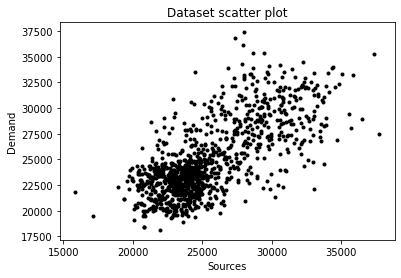

In [ ]:
#create dataset   ## SOURCES -- DEMAND ##
data = np.array([sources_d, demand_d]).T

#plto dataset
plt.scatter(data[:,0], data[:,1], marker='.', color='k')
plt.title('Dataset scatter plot')
plt.xlabel('Sources')
plt.ylabel('Demand')

In [ ]:
X = data
# DBSCAN
db = DBSCAN(eps=2000, min_samples=18).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print('Number of clusters: %d' % n_clusters_)
print('Number of outliers: %d' % n_noise_)

Number of clusters: 1
Number of outliers: 10


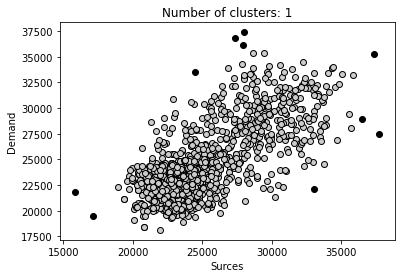

In [ ]:
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
#colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# random color to give the cluster
colors = [[0.8, 0.8, 0.8, 1] for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor='k')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor='k')

plt.title('Number of clusters: %d' % n_clusters_)
plt.xlabel('Surces')
plt.ylabel('Demand')
plt.show()

In [ ]:
#find the outlier days
from datetime import date,timedelta
outliers = []
for i in range(len(labels)):
  if labels[i] == -1:
    outliers.append(i)


start_date = date(2019,1,1)
outlier_dates = []
s = []
d = []

for num in outliers:
  outlier_dates.append(start_date+timedelta(days=num))
  s.append(round(sources_d[num], 2))
  d.append(round(demand_d[num], 2))
resultDf = pd.DataFrame()
resultDf['date'] = outlier_dates
resultDf['supply'] = s
resultDf['demand'] = d

print('The following dates where estimated as outliers: \n')
print(resultDf)

The following dates where estimated as outliers: 

         date    supply    demand
0  2019-02-12  33068.97  22141.15
1  2020-04-18  27938.97  36145.12
2  2020-04-19  37751.61  27470.74
3  2020-04-20  27356.92  36866.26
4  2020-04-21  27992.07  37383.51
5  2020-04-23  36494.59  28891.85
6  2020-04-28  37356.15  35267.95
7  2021-05-07  24453.81  33521.30
8  2021-09-12  15856.02  21812.47
9  2021-12-10  17182.57  19514.36
